# nmi | spring 2024
## final | topics 0601 - 0804, special lectures
## your name here


### q01 (20 pts)[0604] RK (proof)


####<b><font color=green>MATH 385 ONLY</font></b>


assume RHS $f(t,y)$ does not depend on $y$ -- ie, $f(t)$. show that $s_2 = s_3$ in fourth-order runge-kutta and that RK4 is equivalent to simpsons rule for the integral $\int_{t_i}^{t_i+h} f(s) ds$.
</br>

####<b><font color=blue>MATH 685 ONLY</font></b>



 consider IVP $y' = \lambda y$ with solution $y(t) = y_0e^{\lambda t}$.
</br>

##### a) discretize!

calculate $w_1$ for RK4 in terms of $w_0$ for this differential equation.
</br>


##### b) local truncation error.


calculate the local truncation error by setting $w_0 = y_0 = 1$ and determining $y_1 = w_1$. show local truncation error is of size $\mathcal{O}(h^5)$.
</br>


### q02 (20 pts)[0605] variable step-size <b><font color=red>(code)</font></b>


<b><font color=red>this is a code problem.</font></b>
</br></br>

use tolerance = $10^{-8}$ wrt following IVP and its solution:
</br></br>

\begin{align}
  \text{IVP}\quad &\left\{
    \begin{array}
      && y' = \frac{t^3}{y^2} \\
      & y(0) = 1 \\
      & t\in [0,1],
    \end{array}
  \right. \\
  \\
  \text{solution}\quad &y(t) = \left( \frac{3}{4}t^4 + 1\right)^{\frac{1}{3}}.
\end{align}
</br></br>

<i>hint: you may write your own routines but scipy may save you hours of your life.</i>
</br>


<b><font color=blue>you must do all items.</font> this is not an "OR"question.</b>
</br>


#### a) (10 pts) RK23



use any RK23 to approximate the solution to the IVP. report the approximation, its final step-size and its error.
</br>


In [ ]:
import scipy as sp

y_act = lambda x: # finish this
f = lambda t,y:   # y' # finish this
tt = (0,1) # "(,)" is a data type needed for method solve_ivp()
tol = 1e-8
y0 =              # initial value # finish this
yf =              # actual value of y at end of interval finish this

# method 1 ~ steps though it, scipy decides step-size
y_method1 = sp.integrate.RK23(f,tt[0],[y0],tt[1],rtol=tol,atol=tol)
while y_method1.status != "finished":
  s_rc = y_method1.step() # lets ignore warnings
print(f"rk23: t={y_method1.t:.8f} y(t)={y_method1.y[0]:.8f} step={y_method1.step_size:.8f} err={yf-y_method1.y[0]:.8f}")

# method 2 ~ calls method 1
y_method2 = sp.integrate.solve_ivp(f,tt,[y0],method="RK23",rtol=tol,atol=tol)
print(f" ivp: t={y_method2.t[-1]:.8f} y(t)={y_method2.y[0,-1]:.8f} step={y_method2.t[-1]-y_method2.t[-2]:.8f} err={yf-y_method2.y[0,-1]:.8f}")


#### b) (10 pts) RK45



use any RK45 to approximate the solution to the IVP. report the approximation, its final step-size and its error.
</br>


#### c) (5 pts <font color=orange>extra credit</font>) details


which versions of RK23 and RK45 did you implemement and why.
</br>


### q03 (5 pts)[0606] implicit methods



explain the benefit of <b>implicit methods</b> versus <b>explicit methods</b> wrt to <b>stiff equations</b>. include definition of all bolded terms.
</br>


### q04 (5 pts)[0607] multi-step methods


wrt multi-step methods, explain the terms <b>stable</b>, <b>strongly stable</b>, <b>weakly stable</b>.
</br>


### q05 (20 pts)[0702] FDM <b><font color=red>(code)</font></b>


<b><font color=red>this is a code problem.</font></b>
</br></br>

use finite difference method (FDM) with $n=9,19,39$ to approximate solution to following BVP and its solution:
</br></br>

\begin{align}
  \text{BVP}\quad &\left\{
    \begin{array}
      && y'' = (2+4t^2)y \\
      & y(0) = 1 \\
      & y(1) = e.
    \end{array}
  \right. \\
  \\
  \text{solution}\quad &y(t) = e^{t^2}.
\end{align}
</br>


#### a) (15 pts) plot true solution and approximations on a single graph.


#### b) (5 pts) plot error of approximations on a separate graph.


### q06 (20 pts)[070301] collocation <b><font color=red>(code)</font></b>


<b><font color=red>this is a code problem.</font></b>
</br></br>

for the BVP of q05, solve using collocation and $n=8,16$.
</br>


#### a) (15 pts) plot true solution and approximations on a single graph.


n=2,c=[1. 2.]
n=4,c=[ 1.         -0.18858561  1.02729529  1.16129032]


eg 7.11, actual vs n points by collocation



,t,y,t2,w2,t4,w4
0,0.0,1.00000,0.0,1.0,0.00000,1.00000
1,0.1,0.97776,1.0,3.0,0.33333,1.09429
2,0.2,0.99475,NaN,NaN,0.66667,1.67494
3,0.3,1.05167,NaN,NaN,1.00000,3.00000
4,0.4,1.15080,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
6,0.6,1.49344,NaN,NaN,NaN,NaN
7,0.7,1.75070,NaN,NaN,NaN,NaN
8,0.8,2.07823,NaN,NaN,NaN,NaN
9,0.9,2.48917,NaN,NaN,NaN,NaN


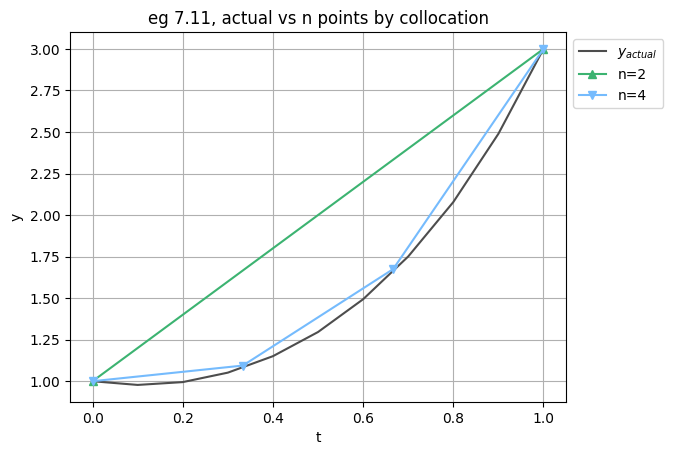

In [ ]:
# example 11 collocation

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def main():

  # actual
  y_actual = lambda t: np.exp(pow(t,2))

  # bvp: bv,t
  bv = [1,np.e]
  tt = [0,1]

  # interval, step-size
  #n = 9 # points between interval end points
  ns = [8,16]
  for n in ns:

    # basis
    phi = lambda t,j: pow(t,j)
    f = lambda t,j: j*(j-1)*phi(t,j-2) - (2+4*t^2)*phi(t,j) # y''
    def y_coll(t,c,n):                              # collocation
      rc = 0
      for j in range(n):
        rc += c[j]*phi(t,j)
      return rc

    # n points
    ns = np.array([2,4])
    nmax = max(ns)

    # datastore, allocate
    ymax = 11 # enough actual points to look like a curve
    ds = np.empty((max(nmax,ymax),2*(ns.size+1))) # cols: (x,y) x (actual + n trials)
    ds[:] = np.nan

    # set, save, label actual
    ts = np.linspace(t[0],t[1],ymax)
    ys = np.zeros_like(ts)
    ys = y_actual(ts)
    ds[0:ts.size,0] = ts
    ds[0:ys.size,1] = ys
    scols = ["t","y"]

    # calculate coeffs for n in (ns)
    for k in range(ns.size):
      n = ns[k]
      # n-1 subintervals
      ts = np.linspace(t[0],t[1],n)

      # a
      a = np.zeros((n,n))
      for i in range(n): # rows
        for j in range(n): # cols ~ basis terms
          if (i>0) and (i<n-1):   # intermediate
            a[i,j] = f(ts[i],j)
          else:
            a[i,j] = phi(ts[i],j) # boundary

      # g
      g = np.zeros((n,1))
      g[0],g[n-1] = bv[0],bv[1]

      # c, basis coefficients
      c_phi = np.zeros_like(g)
      c_phi = np.linalg.solve(a,g) # <--- this is the solver
      print(f"n={n},c={c_phi.flatten()}")

      # use the approx coeffs
      w = np.zeros_like(c_phi)
      w = y_coll(ts,c_phi,n)

      # save + label cols
      ds[0:ts.size,2*(k+1)] = ts
      ds[0:w.size,2*(k+1)+1] = w
      scols.append("t"+str(n))
      scols.append("w"+str(n))

    # dataframe from datastore
    s_title = "example 11, actual vs n points by collocation"
    print(f"\n\n"+s_title+"\n") # bc pf.style.set_caption() bites in colab atm
    pd.set_option("display.max_rows",10)
    pd.set_option("display.precision",5)
    df = pd.DataFrame(data=ds,columns=scols)
    if True: # spreadsheet
      display(df)

    if True: # plot using pandas
      print() # spacer
      ax1  = df.plot(x="t",y="y",label="$y_{actual}$",color=".3")
      ax11 = df.plot(x="t2",y="w2",label="n=2",ax=ax1,color="mediumseagreen",marker="^")
      ax12 = df.plot(x="t4",y="w4",label="n=4",ax=ax1,color="xkcd:sky blue",marker="v")
      ax1.set_title(s_title)
      ax1.set_xlabel("t")
      ax1.set_ylabel("y")
      ax1.grid('on',which='major',axis='x')
      ax1.grid('on',which='major',axis='y')

      plt.legend(bbox_to_anchor=(1,1))
      plt.show()

if __name__ == "__main__":
  main()


#### b) (5 pts) plot error of approximations on a separate graph.


### q07 (5 pts)[070302] FEM


##### a) (5 pts)


briefly discuss finite element method (FEM) and specifically galerkins method.
</br>


##### b) (5 pts extra credit)


who is galerkin of galerkins method?
</br>


### q08 (25 pts)[0801] PDEs (parabolic) crank-nicolson <b><font color=red>(code)</font></b>


<b><font color=red>this is a code problem.</font></b>
</br>


\begin{align}
  \text{BVP}\quad &\left\{
    \begin{array} &
      & u_t = 2u_{xx} \\
      & u(x,0) = e^x & 0\le x\le 1 \\
      & u(0,t) = e^{2t} & 0\le t\le 1 \\
      & u(1,t) = e^{2t+1} & 0\le t\le 1 \\
    \end{array}
  \right. \\
  \\
  \text{solution}\quad &u(x,t) = e^{2t+x}.
\end{align}
</br>

#### a) (20 pts) solve with crank-nicolson.


use stepsizes $h=k=0.02,0.01.0.005$.
</br>


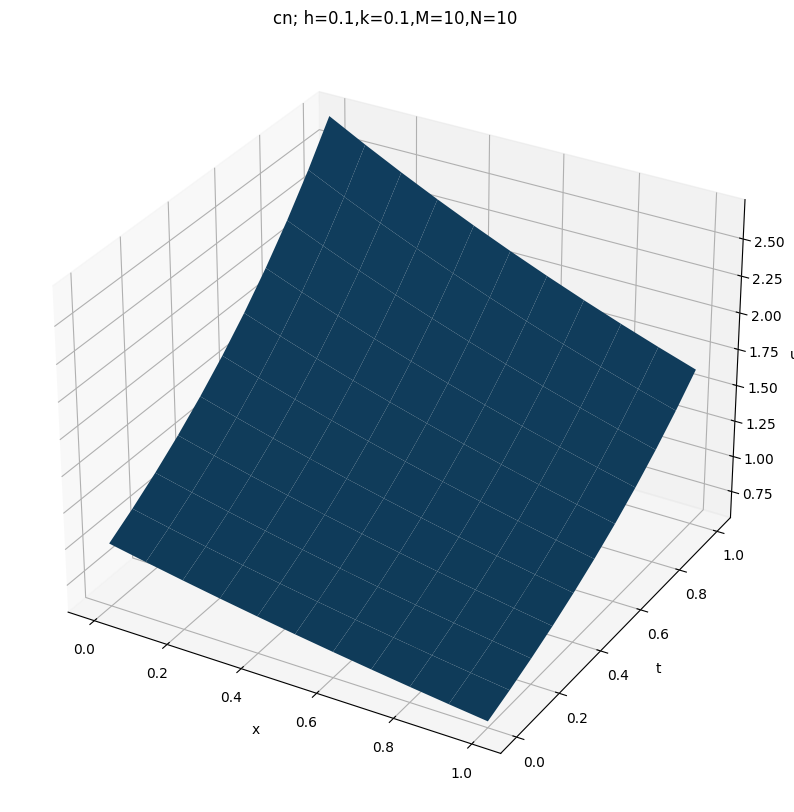

In [ ]:
# example 04 ~ adjusted from program 04

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# actual
U_act = lambda x,t: np.exp(t-x/2) # update

# bvp
U = lambda x: np.exp(-x/2) # update
BCL = lambda x,t: np.exp(t) # update
BCR = lambda x,t: np.exp(t-1/2) # update

# some parms
D = 2  # diffusion constant # update

# mesh
x,t = [0,1],[0,1]
# h = k = 0.1
hs = [0.02,0.01,0.005]
for h in hs:
  k = h
  M = round((x[1]-x[0])/h)
  N = round((t[1]-t[0])/k)
  m = M-1 # interior points [1,m]
  n = N   # time steps [1,n] ~ [0,n); however, solution [0,n]
  sigma = D*k/pow(h,2)

  # DF for interior
  a = np.zeros((m,m))
  a.flat[0::m+1] = 2+2*sigma
  a.flat[1::m+1] = a.flat[m::m+1] = -sigma
  b = np.zeros((m,m))
  b.flat[0::m+1] = 2-2*sigma
  b.flat[1::m+1] = b.flat[m::m+1] =  sigma

  # approx soln, initialize
  ws = np.zeros((M+1,N+1)) # [0:M,0:N]

  # approx soln, bc
  ts = np.linspace(t[0],t[1],n+1)
  ws[0,:] = BCL(x[0],ts)
  ws[M,:] = BCR(x[1],ts)

  # approx soln, ic
  xs = np.linspace(x[0],x[1],M+1)
  ws[:,0] = U(xs) # ic

  # approx soln, calc interior % w(:,j+1)=a\(b*w(:,j)+sigma*sides);
  for j in range(n):
    ws[1:m+1,j+1] = ws[1:m+1,j]
    ws[1:m+1,j+1] = np.dot(b,ws[1:m+1,j+1])
    ws[1,j+1] += sigma*(ws[  0,j]+ws[  0,j+1])
    ws[m,j+1] += sigma*(ws[m+1,j]+ws[m+1,j+1])
    ws[1:m+1,j+1] = np.dot(np.linalg.inv(a),ws[1:m+1,j+1])

  if False:
    print(ws[0:11,0:6])

  # plot some
  if True:
    x,y = np.meshgrid(xs,ts,indexing='ij')
    fig,axs = plt.subplots(1,1,figsize=(10,10),subplot_kw={'projection':'3d'})

    axs.set_title("cn; h="+str(h)+",k=" + str(k)+",M="+str(M)+",N="+str(N))
    #axs.plot_wireframe(x,y,ws)
    axs.plot_surface(x,y,ws)
    axs.set_xlabel("x")
    axs.set_ylabel("t")
    axs.set_zlabel("u")

plt.show()


In [ ]:
# to get values for w[i] at x = 0.5, t = 1

if True: # table error
  i_space,i_time = ws.shape # ~ ws is w[i]
  i_space = int((i_space-1)/2 + 1)
  x_test = 0.5
  t_test = 1.0
  u_act = U_act(x_test,t_test)
  u_mod = ws[i_space-1,i_time-1]
  data.append([h,u_act,u_mod,u_mod-u_act])


#### b) (5 pts) display output.



format output in table. include exact value, approximate value, error at $(x,t) = (0.5,1)$ for stepsizes above.
</br>


### q09 (10 pts)[0802] PDEs (hyperbolic) <b><font color=red>(choice)</font></b>


\begin{align}
  \text{BVP}\quad &\left\{
    \begin{array} &
      & u_{tt} = 16 u_{xx} \\
      & u(x,0) = sin\,\pi x & 0\le x\le 1 \\
      & u_t(x,0) = 0 & 0\le x\le 1 \\
      & u(0,t) = 0 & 0\le t\le 1 \\
      & u(1,t) = 0 & 0\le x\le 1 \\
    \end{array}
  \right. \\
  \\
  \text{solution}\quad &u(x,t) = sin\,\pi x \cdot cos\, 4\pi t.
\end{align}
</br>

<b><font color=blue>choose one item.</font> this is an "OR"question.</b>
</br>


#### a) (10 pts) verify $u(x,t)$ is solution to BVP.


#### b) (20 pts) solve with FDM and plot sensibly. <b><font color=red>(code)</font></b>


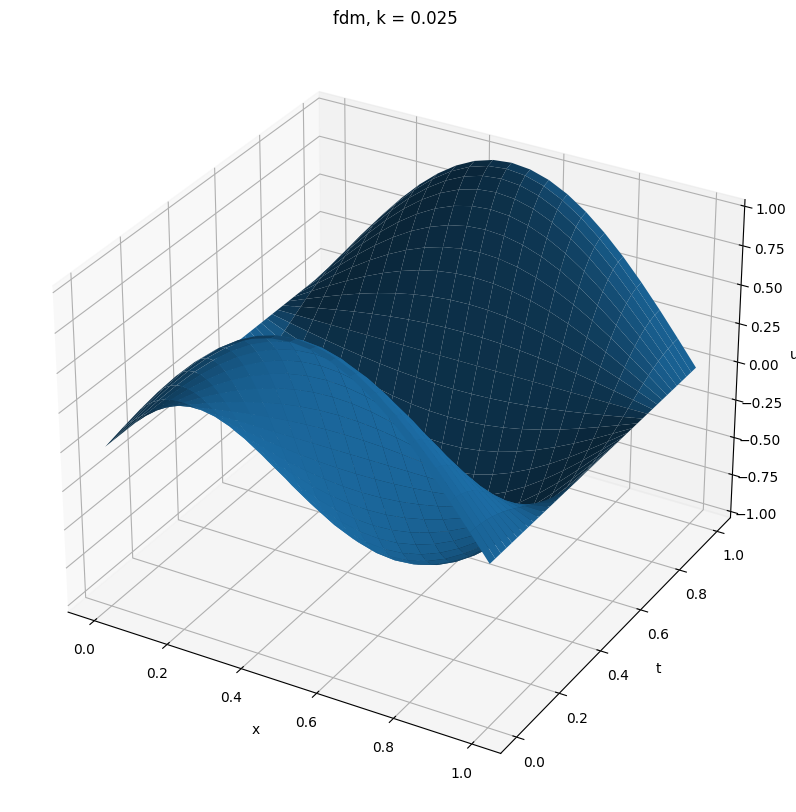

In [ ]:
# example 06 ~ mod program 01

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

np.set_printoptions(precision=3,suppress=True)

U_act = lambda x,y: # code some stuff

# bvp
U = lambda x: np.sin(np.pi*x) # change if needed
G = lambda x: 0*x
BCL = lambda x,t: 0*t
BCR = lambda x,t: 0*t

# some parms
c = 4   # diffusion constant
h = 0.05  # subintervals, step or count
k = 0.025 # subintervals, step or count

# mesh
x,t = [0,1],[0,1]
M = round((x[1]-x[0])/h) # subinterval size, x
N = round((t[1]-t[0])/k) # subinterval size, t
m = M-1 # interior points [1,m]
n = N   # time steps [1,n] ~ [0,n); however, solution [0,n]
sigma2 = pow(c*k/h,2)

# DF for interior
a = np.zeros((m,m))
a.flat[0::m+1] = 2-2*sigma2              # diagonal
a.flat[1::m+1] = a.flat[m::m+1] = sigma2 # offset

# approx soln

# initialize
ws = np.zeros((m+2,n+1)) # [0:M,0:N]

# bc # the sides of the known U-shape in the mesh
ts = np.linspace(t[0],t[1],n+1)
ws[0,:] = BCL(x[0],ts)
ws[m+1,:] = BCR(x[1],ts)

# ic # the bottom of the known U-shape in the mesh
xs = np.linspace(x[0],x[1],M+1)
ws[:,0] = U(xs) # ic, position

# interior, step 1
ws[:,1] = G(xs) # ic, velocity
ws[1:m+1,1] = np.dot(a,ws[1:m+1,0])/2 + k*ws[1:m+1,1] # influence from ic,iv
ws[1,1] += sigma2*ws[  0,0]/2  # influence from BCL
ws[m,1] += sigma2*ws[m+1,0]/2  # influence from BCR

# interior, step j (in time)
for j in range(1,n): # [0,n)
  ws[1:m+1,j+1] = np.dot(a,ws[1:m+1,j]) - ws[1:m+1,j-1]
  ws[1,j+1] += sigma2*ws[  0,j]/2  # influence from BCL
  ws[m,j+1] += sigma2*ws[m+1,j]/2  # influence from BCR

# plot some
if True:
  x,y = np.meshgrid(xs,ts,indexing='ij') # yep its cartesian vs ij; will adj later
  fig,axs = plt.subplots(1,1,figsize=(10,10),subplot_kw={'projection':'3d'})

  axs.set_title("fdm, k = " + str(k))
  axs.plot_surface(x,y,ws)
  axs.set_xlabel("x")
  axs.set_ylabel("t")
  axs.set_zlabel("u")

  plt.show()

if False:
  print(ws[0:21,0:6])


### q10 (10 pts <font color=orange>extra credit</font>)[0803] PDEs (elliptic) <b><font color=red>(choice)</font></b>


\begin{align}
  \text{BVP}\quad &\left\{
    \begin{array} &
      & \Delta u = u_{xx} + u_{yy} = 0 & \text{laplace equation} \\
      & u(x,0) = sin\,\pi x & 0\le x\le 1 \\
      & u(x,1) = e^{-\pi}sin\,\pi x & 0\le x\le 1 \\
      & u(0,y) = 0 & 0\le t\le 1 \\
      & u(1,y) = 0 & 0\le x\le 1 \\
    \end{array}
  \right. \\
  \\
  \text{solution}\quad &u(x,y) = e^{-\pi y}sin\,\pi x.
\end{align}
</br>

<b><font color=blue>choose one item.</font> this is an "OR"question.</b>
</br>


#### a) (10 pts) verify $u(x,y)$ is solution to laplace equation with given boundary values.


#### b) (20 pts) solve with FDM and plot sensibly. <b><font color=red>(code)</font></b>


use $h = k = 0.1$.
</br>


### q11 (10 pts <font color=orange>extra credit</font>)[0804] PDEs, nonlinear (proof)


show that for any constant $c$, the function $u(x,t) = c$ is an equilibrium  solution of burgers equation, $u_t + uu_x = Du_{xx}$.
</br>


## special lecture 01: uniform random number generator (RNG)


### q12 (10 pts)[SL01] minimum standard generator


#### a) (5 pts) explain how minimum standard random number generator uses LCG.

#### b) (5 pts) why were those values chosen?


### q13 (10 pts)[SL01] monte carlo


example two of the first special lecture was a type two monte carlo problem.
</br>


#### a) (5 pts) explain how RNG approximates mean.


#### b) (5 pts) explain how RNG was used to approximate area.


### q14 (20 pts <font color=orange>extra credit</font>)[SL01] <b><font color=red>code</font></b>


use $n = 10^4$ pseudo-random points to (a) estimate the interior area of the ellipse
</br></br>

$$40x^2 + 25y^2 + y + \frac{9}{4} \le 52xy + 14x \qquad 0\le x,y\le 1$$
</br>

and (b) compare estimate with true value $\frac{\pi}{18}$.
</br>


## special lecture 02: hyperplanes


### q15 (5 pts) application.


explain how the hyperplane separation theory might be used in error analysis. (note: will also review this first monday after spring break.)
</br>


### q16 (10 pts <b><font color=blue>MATH685 ONLY</font></b>) (proof-lite)


describe how to use the two lemmas at the beginning of the hyperplanes lecture to prove the minkowski hyperplane separation theorem. (note: dont do the full-blown hahn-banach proof!! thats far too much.)
</br>


## special lecture 03: perceptrons


### q17 (5 pts) conceptualization.


explain how the components and methods of a perceptron relate to components and methods of a biological neuron.
</br>

### q18 (5 pts) application.



excluding the activation function, explain what methodology from this course applies where wrt implementation of a perceptron.
</br>


## special lecture 04: neural nets


### q19 (5 pts) briefly explain the relevance of hyperplane separation wrt neural nets.


### q20 (5 pts) name two activation functions, briefly state their pros and cons and briefly state what problems they are best suited for.


### q21 (10 pts) provide your <font color=red>code</font> from the first lab for this special lecture. (note: the code must execute correctly for points.)


### q22 (5 pts) what is the limitation of a perceptron and how is it overcome? (eg, consider the XOR problem.)


### q23 (20 pts) provide your <font color=red>code</font> from the second lab for this special lecture. (note: the code must execute correctly for points.)



In [ ]:
# your code, part 1: XOR with binary input
#
# use class sklearn.neural_network.MLPClassifier with 1 hidden layer

import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


# XOR data, binary
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

# code some stuff here

# Create and train the MLP Classifier
mlp = MLPClassifier(solver='lbfgs',activation='logistic',hidden_layer_sizes=(1,),random_state=1)
mlp.fit(X, y)

# Evaluate the model on the test set
new_data = [[1,0]]
prediction = mlp.predict(new_data)
print("results:",prediction)


### q24 (5 pts) briefly compare stochastic gradient descent (SGD) with the gradient descent and identify two popular implementations of SGD.


### q25 (5 pts) what are some problems inherent with the wildfire data initially meant for the final lab basic for neural networks?



### q26 (5 pts) discuss various ways of setting initial weights and biases and their pros and cons. discuss with the stability of results in mind.


### q27 (5 pts) name one problem with the implementation of neural networks and discuss current methods to address it. (answer this as you might if it was a short answer interview question and you wanted the job.)


### q28 (5 pts) python is not a fast language. why does it get so much use for even very large neural networks?


##  <font color=orange>extra credit</font>


cumulative material. ie, from every part of the semester.
</br>


ec01. (5 pts) given $\mathbb{F}(8,4,2,2)$ with standard bias, what are (a) smallest possible positive number and (b) range?
</br>


ec02. (5 pts) what is a numerical method?
</br>


ec03. (5 pts) in comparison, what is numerical analysis?
</br>


ec04. (5 pts) what is $cond(A)$ and what is its relevance wrt numerical methods? what is a good value?
</br>


ec05. (5 pts) compare bisection with fixed-point iteration (in general).
</br>


ec06. (5 pts) find the bugs! (1 precious point per bug.)
</br></br>


```
import math
import matplotlib.pyplot as plt

def main():
  x = 20 zillion
  y = whatever
  print(x+y)
  math.dot(x,y)
  print()
  print(this is the most nonsense code)
  plt.show()

if __main__ == "__name__":
  print("no way!")
  main()

```



ec07 (5 pts) explain the evolution: gauss elimination $\rightarrow$ LU factorization $\rightarrow$ PA=LU factorization.
</br>

ec08 (5 pts) explain the pros and cons of interpolation vs least squares.
</br>


ec09. (5 pts) explain how halving stepsizes and richardson extrapolation are used in romberg integration.
</br>

ec10. (5 pts) what is the difference between adaptive quadrature and guassian quadrature?
</br>


ec11. (5 pts) if you want to label specific points in a matplotlib plot, what is one way to do that?
</br>


ec12. (5 pts) if you want to have two plots side-by-side using matplotlib, what is one way to do that?
</br>


ec13. (5 pts) wrt matplotlib, what are colors "C0","C1","C2"?
